<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Sebastian Fuentes Araneda</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Generar una imagen de una función trigronométrica (función bidimensional) 
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal. 


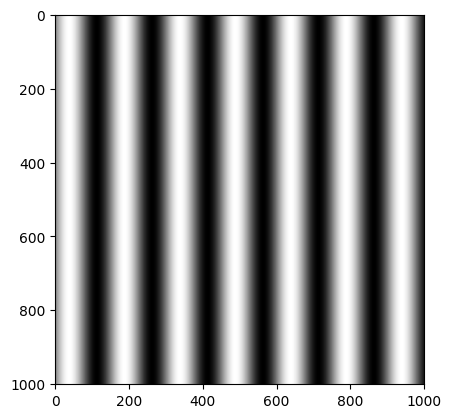

In [43]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 1001, 1)
X, Y = np.meshgrid(x, x)
wavelength = 150
grating = np.sin(2 * np.pi * X / wavelength)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()


## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


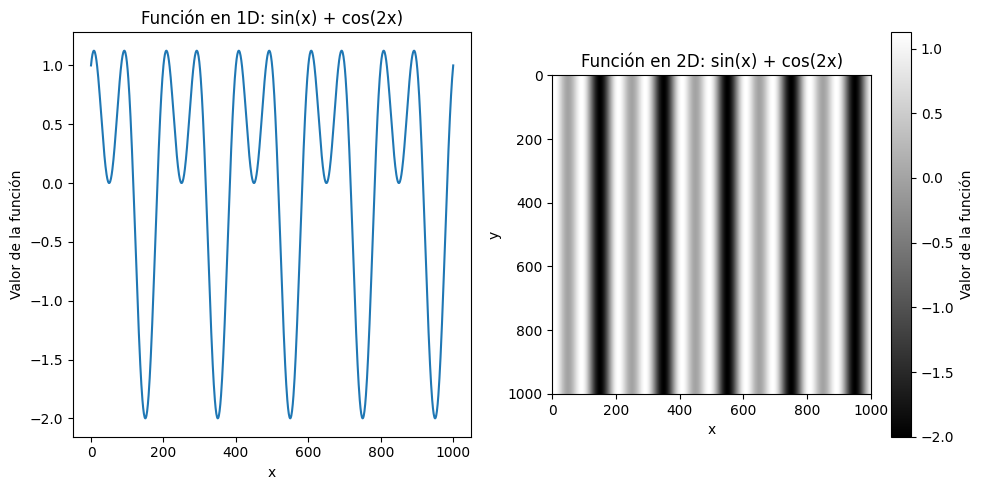

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para x
x = np.arange(0, 1001, 1)

# Calcular la función en 1D
wavelength = 200
function_1d = np.sin(2 * np.pi * x / wavelength) + np.cos(2 * np.pi * x / (wavelength / 2))

# Calcular la función en 2D
X, Y = np.meshgrid(x, x)
grating = np.sin(2 * np.pi * X / wavelength) + np.cos(2 * np.pi * X / (wavelength / 2))

# Graficar la función en 1D
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, function_1d)
plt.title('Función en 1D: sin(x) + cos(2x)')
plt.xlabel('x')
plt.ylabel('Valor de la función')

# Graficar la función en 2D
plt.subplot(1, 2, 2)
plt.imshow(grating, cmap='gray')
plt.title('Función en 2D: sin(x) + cos(2x)')
plt.colorbar(label='Valor de la función')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()



Se graficó la funcion en una dimensión como tambien en 2D. Se puede apreciar en el grafico 2D que toma distintos tonos de grises dependiendo de la amplitud de la señal.

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

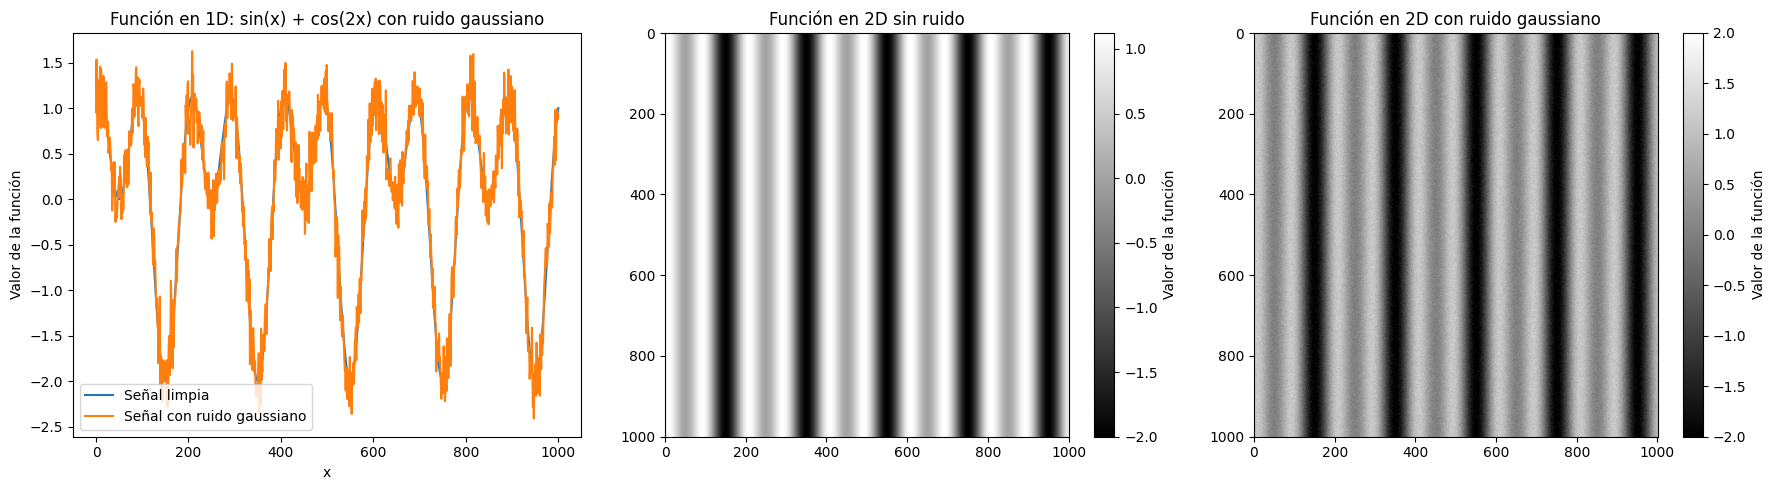

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para x (para la función 1D)
x_1d = np.arange(0, 1001, 1)

# Definir el rango de valores para x y y (para la función 2D)
x_2d = np.arange(0, 1001, 1)
X, Y = np.meshgrid(x_2d, x_2d)

# Calcular la función en 1D
wavelength = 200
funcion1x = np.sin(2 * np.pi * x_1d / wavelength) + np.cos(2 * np.pi * x_1d / (wavelength / 2))

# Agregar ruido gaussiano a la señal 1D
mean = 0
std_dev = 0.2  # Desviación estándar para la distribución gaussiana
noise_1d = np.random.normal(mean, std_dev, size=len(funcion1x))
function_1d_noisy = funcion1x + noise_1d

# Calcular la función en 2D
funcion2x = np.sin(2 * np.pi * X / wavelength) + np.cos(2 * np.pi * X / (wavelength / 2))

# Agregar ruido gaussiano a la señal 2d
noise_2d = np.random.normal(mean, std_dev, funcion2x.shape)
funcion2x_noisy = funcion2x + noise_2d

# Graficar las funciones en 1D y 2D con y sin ruido
plt.figure(figsize=(18, 5))

# Graficar la función en 1D con y sin ruido
plt.subplot(1, 3, 1)
plt.plot(x_1d, funcion1x, label='Señal limpia')
plt.plot(x_1d, function_1d_noisy, label='Señal con ruido gaussiano')
plt.title('Función en 1D: sin(x) + cos(2x) con ruido gaussiano')
plt.xlabel('x')
plt.ylabel('Valor de la función')
plt.legend()

# Graficar la función en 2D sin ruido
plt.subplot(1, 3, 2)
plt.imshow(funcion2x, cmap='gray')
plt.title('Función en 2D sin ruido')
plt.colorbar(label='Valor de la función')

# Graficar la función en 2D con ruido gaussiano
plt.subplot(1, 3, 3)
plt.imshow(funcion2x_noisy, cmap='gray')
plt.title('Función en 2D con ruido gaussiano')
plt.colorbar(label='Valor de la función')
plt.clim(-2, 2)  # Ajustar el rango de la barra de color para que vaya de -1 a 1

plt.tight_layout()
plt.show()


## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


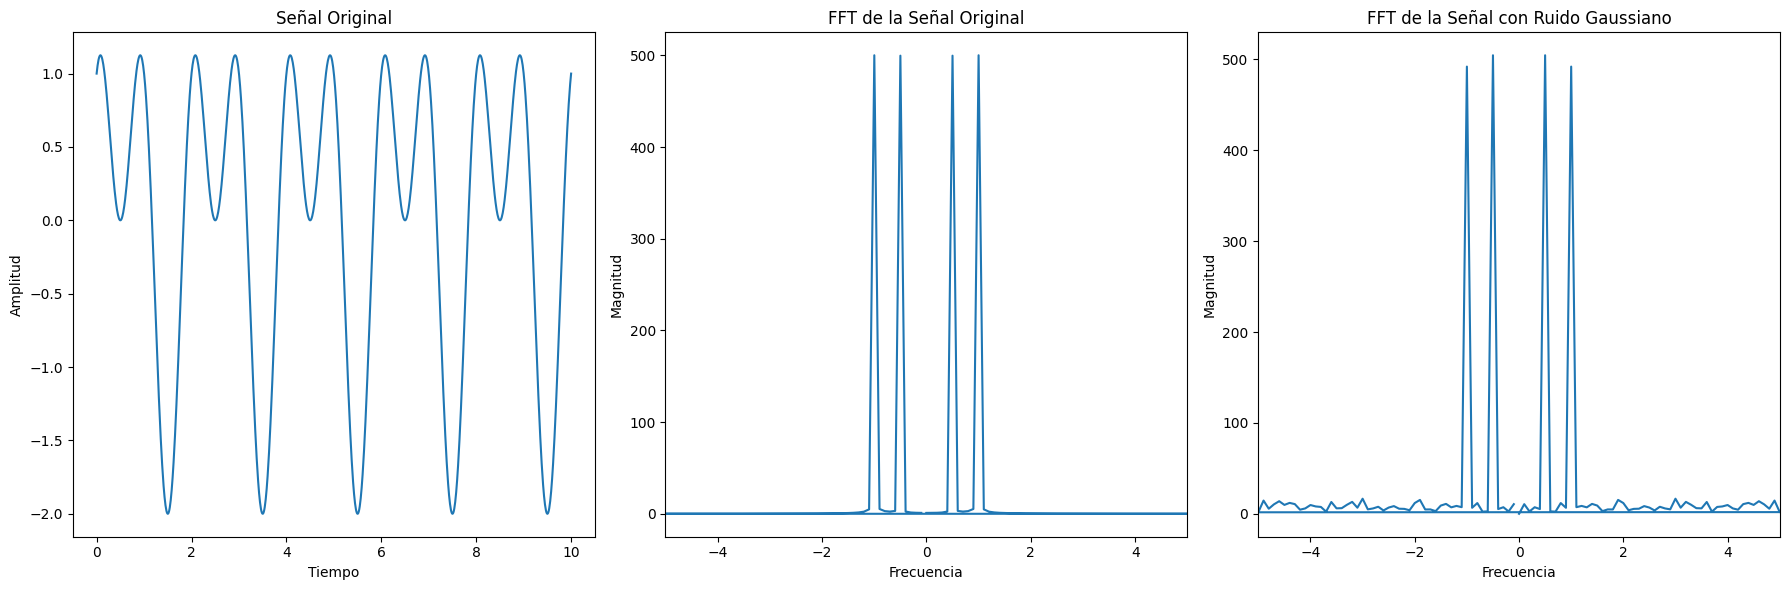

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal
X = np.linspace(0, 10, 1000)  # Variable independiente
wavelength = 2  # Longitud de onda

grating = np.sin(2 * np.pi * X / wavelength) + np.cos(2 * np.pi * X / (wavelength / 2))

# Agregar ruido gaussiano a la señal
mean = 0
std_dev = 0.3
noise = np.random.normal(mean, std_dev, len(X))
grating_with_noise = grating + noise

# Calcular la FFT de la señal con ruido
fft_result_with_noise = np.fft.fft(grating_with_noise)
frequencies_with_noise = np.fft.fftfreq(len(grating_with_noise), d=X[1]-X[0])

# Crear el gráfico
plt.figure(figsize=(18, 6))

# Graficar la señal original
plt.subplot(1, 3, 1)
plt.plot(X, grating)
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Graficar la magnitud de la FFT de la señal original
plt.subplot(1, 3, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('FFT de la Señal Original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.xlim(-5, 5)

# Graficar la magnitud de la FFT de la señal con ruido
plt.subplot(1, 3, 3)
plt.plot(frequencies_with_noise, np.abs(fft_result_with_noise))
plt.title('FFT de la Señal con Ruido Gaussiano')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.xlim(-5, 5)

plt.tight_layout()
plt.show()




<Figure size 640x480 with 0 Axes>

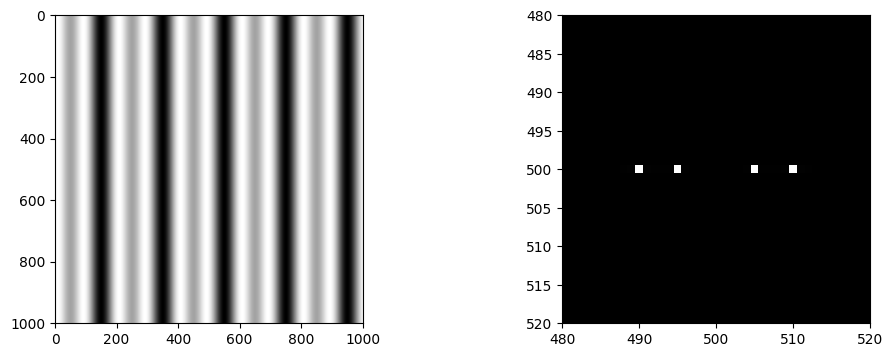

In [164]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1001, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength) + np.cos(2 * np.pi * X / (wavelength / 2))

plt.set_cmap("gray")
plt.figure(figsize=(12, 4))  # Tamaño de la figura: ancho x alto
plt.subplot(1,2,1)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(1,2,2)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])
plt.show()


### 3.2 Obten un resultado Normalizado: 
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

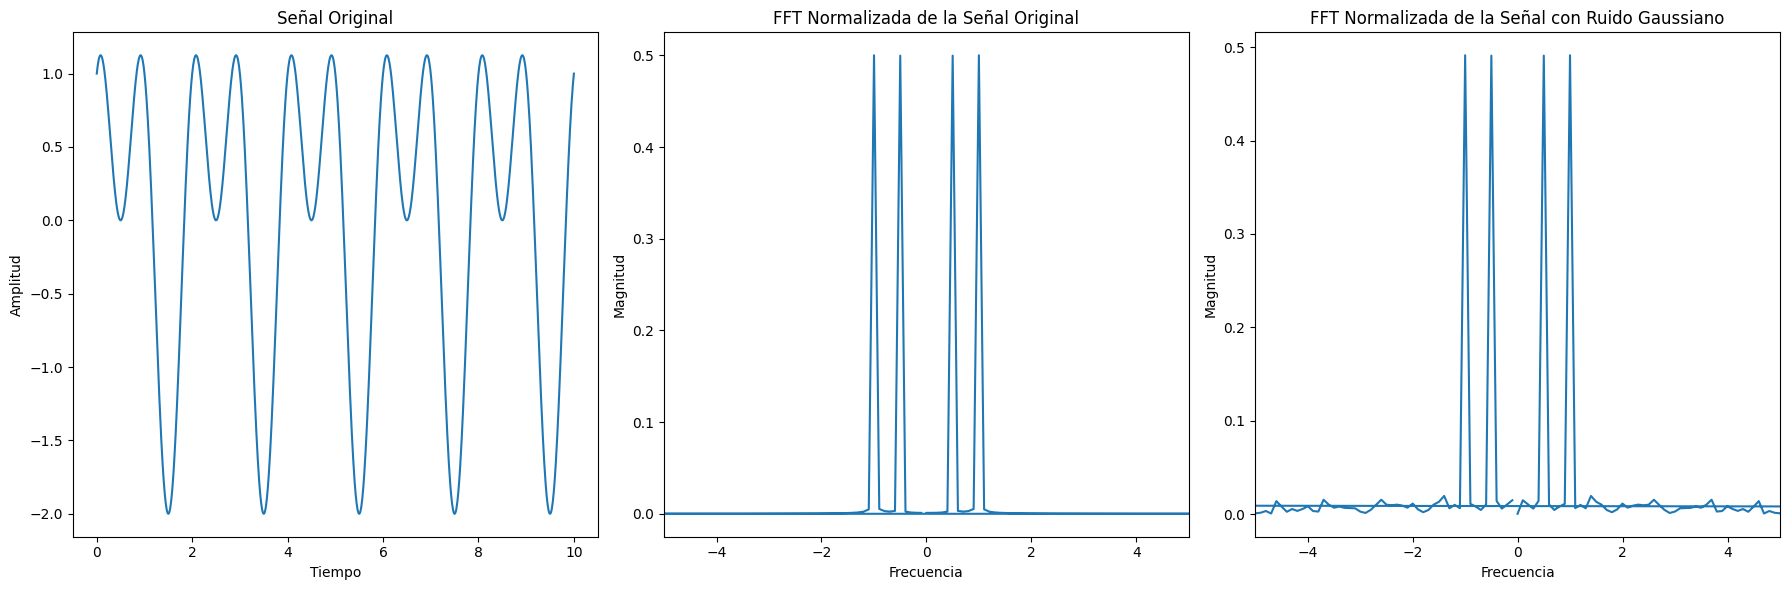

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal
X = np.linspace(0, 10, 1000)  # Variable independiente
longitud_onda = 2  # Longitud de onda

rejilla = np.sin(2 * np.pi * X / longitud_onda) + np.cos(2 * np.pi * X / (longitud_onda / 2))

# Agregar ruido gaussiano a la señal
media = 0
desviacion_estandar = 0.3
ruido = np.random.normal(media, desviacion_estandar, len(X))
rejilla_con_ruido = rejilla + ruido

# Calcular la FFT de la señal original y normalizarla
fft_resultado = np.fft.fft(rejilla)
fft_resultado_normalizado = fft_resultado / len(rejilla)
frecuencias = np.fft.fftfreq(len(rejilla), d=X[1]-X[0])

# Calcular la FFT de la señal con ruido y normalizarla
fft_resultado_con_ruido = np.fft.fft(rejilla_con_ruido)
fft_resultado_con_ruido_normalizado = fft_resultado_con_ruido / len(rejilla_con_ruido)
frecuencias_con_ruido = np.fft.fftfreq(len(rejilla_con_ruido), d=X[1]-X[0])

# Crear el gráfico
plt.figure(figsize=(18, 6))

# Graficar la señal original
plt.subplot(1, 3, 1)
plt.plot(X, rejilla)
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Graficar la magnitud normalizada de la FFT de la señal original
plt.subplot(1, 3, 2)
plt.plot(frecuencias, np.abs(fft_resultado_normalizado))
plt.title('FFT Normalizada de la Señal Original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.xlim(-5, 5)

# Graficar la magnitud normalizada de la FFT de la señal con ruido
plt.subplot(1, 3, 3)
plt.plot(frecuencias_con_ruido, np.abs(fft_resultado_con_ruido_normalizado))
plt.title('FFT Normalizada de la Señal con Ruido Gaussiano')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.xlim(-5, 5)

plt.tight_layout()
plt.show()


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

<Figure size 640x480 with 0 Axes>

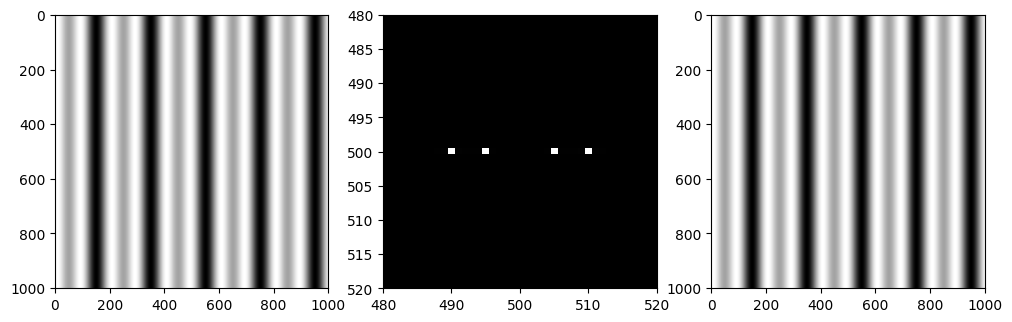

In [197]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1001, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength) + np.cos(2 * np.pi * X / (wavelength / 2))

plt.set_cmap("gray")
plt.figure(figsize=(12, 4))  # Tamaño de la figura: ancho x alto

plt.subplot(1,3,1)
plt.imshow(grating)

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(1,3,2)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])

# Calculate inverse Fourier transform of the Fourier transform
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part

plt.subplot(1,3,3)
plt.imshow(ift)
plt.show()


### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo 
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

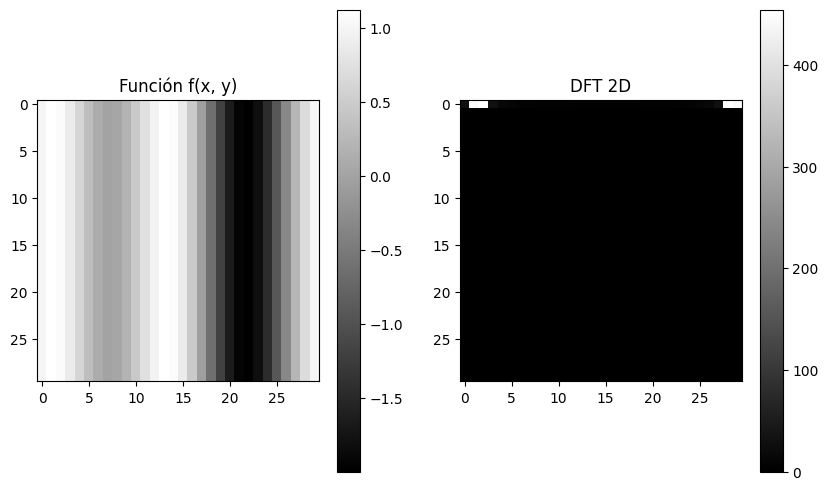

In [214]:
import numpy as np
import matplotlib.pyplot as plt

def custom_dft_2d(signal):
    """
    Calcula la Transformada Discreta de Fourier 2D de una señal.
    """
    N, M = signal.shape
    result = np.zeros((N, M), dtype=np.complex128)

    for u in range(N):
        for v in range(M):
            for x in range(N):
                for y in range(M):
                    result[u, v] += signal[x, y] * np.exp(-1j * 2 * np.pi * (u * x / N + v * y / M))

    return result

# Crear una cuadrícula de puntos (x, y)
x = np.linspace(0, 2 * np.pi, 30)
y = np.linspace(0, 2 * np.pi, 30)
X, Y = np.meshgrid(x, y)

# Calcular la función f(x, y)
signal = np.sin(X) + np.cos(2 * X)

# Calcular la DFT 2D personalizada
dft_result = custom_dft_2d(signal)


plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(signal, cmap='gray')
plt.title('Función f(x, y)')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.abs(dft_result), cmap='gray')
plt.title('DFT 2D')
plt.colorbar()

plt.show()




### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

El ruido gaussiano en el dominio del tiempo afecta la forma y la amplitud de la señal original agregando variaciones aleatorias, mientras que el ruido en el dominio de la frecuencia afecta la distribución de energía en las diferentes frecuencias de la señal sin alterar su forma de onda en el dominio del tiempo.

Cuando tienes una señal que es la suma de un coseno y un seno, la Transformada de Fourier mostrará picos en las frecuencias de ambos componentes. Esto se debe a que tanto el coseno como el seno contribuyen a la frecuencia total de la onda. Los picos en el espectro de frecuencia reflejarán las amplitudes de estos componentes, lo que te permite averiguar la frecuencia y la amplitud de la señal original, tal como se ilustra en los gráficos de la actividad 3.

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html